In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
# Define input and output folder paths
output_folder = "/Users/favourokpali/Documents/Semester 2/ECE9022-Assignments/FinalProject/output_images/"
input_folder = "/Users/favourokpali/Documents/Semester 2/ECE9022-Assignments/FinalProject/images/"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

In [15]:
def enhance_image(image):
    # Convert to LAB color space for contrast enhancement
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to improve contrast
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l = clahe.apply(l)

    # Merge back and convert to BGR
    enhanced_lab = cv2.merge([l, a, b])
    enhanced_img = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)

    # Apply a slight Gaussian blur to remove noise
    blurred = cv2.GaussianBlur(enhanced_img, (3, 3), 0)

    # Apply sharpening filter to enhance edges
    sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharp_img = cv2.filter2D(blurred, -1, sharpen_kernel)

    # Convert to HSV for better color segmentation
    hsv = cv2.cvtColor(sharp_img, cv2.COLOR_BGR2HSV)
    
    # Define HSV ranges for road sign colors
    color_ranges = {
        "red": [(np.array([0, 120, 70]), np.array([10, 255, 255])), (np.array([170, 120, 70]), np.array([180, 255, 255]))],
        "yellow": [(np.array([15, 100, 100]), np.array([35, 255, 255]))],
        "blue": [(np.array([90, 50, 50]), np.array([130, 255, 255]))],
        "white": [(np.array([0, 0, 200]), np.array([180, 30, 255]))]
    }

    # Create a mask for the detected colors
    final_mask = np.zeros(hsv.shape[:2], dtype=np.uint8)
    for color, ranges in color_ranges.items():
        for lower, upper in ranges:
            mask = cv2.inRange(hsv, lower, upper)
            final_mask = cv2.bitwise_or(final_mask, mask)
    
    # Extract the detected signs
    detected_signs = cv2.bitwise_and(sharp_img, sharp_img, mask=final_mask)
    
    return detected_signs

/Users/favourokpali/Documents/Semester 2/ECE9022-Assignments/FinalProject/output_images/road264.png
/Users/favourokpali/Documents/Semester 2/ECE9022-Assignments/FinalProject/output_images/road728.png
/Users/favourokpali/Documents/Semester 2/ECE9022-Assignments/FinalProject/output_images/road714.png
/Users/favourokpali/Documents/Semester 2/ECE9022-Assignments/FinalProject/output_images/road700.png


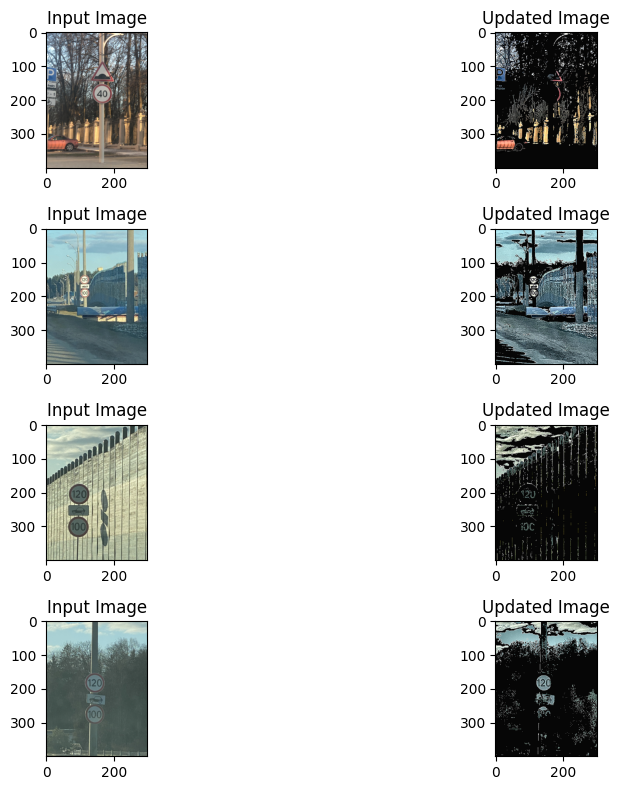

In [16]:
# Number of samples to display
num_samples = 4

# Get the first 'num_samples' image names
image_names = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg'))][100:104]

# Create subplots
fig, axes = plt.subplots(num_samples, 2, figsize=(12, 2 * num_samples))

# Loop through selected images
for i, image_name in enumerate(image_names):
    image_path = os.path.join(input_folder, image_name)
    updated_image_path = os.path.join(output_folder, image_name)
    print(updated_image_path)
    
    # Read the image
    image = mpimg.imread(image_path)
    updated_image = mpimg.imread(updated_image_path)
    
    # Display Input Image
    axes[i, 0].imshow(image)
    axes[i, 0].set_title("Input Image")

    # Display Updated Image (Modify this if needed)
    axes[i, 1].imshow(updated_image)  # Replace with processed image
    axes[i, 1].set_title("Updated Image")

# Adjust layout and show the figure
plt.tight_layout()
plt.show()
